# Problem statement¶
To perform a comprehensive
analysis of the dataset, to extract insights
about the top YouTube content creators.

# Objectives¶
    . Data Exploration
    . Trend Analysis
    . Audience Study
    . Performance Metrics
    . Content Categories
    . Brands and Collaborations
    . Benchmarking
    . Content Recommendations

# Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the Youtube Streamers Dataset

In [2]:
df = pd.read_csv('youtubers_df.csv')

## Reviewing the dataset

In [3]:
df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [4]:
df.tail()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
995,996,hamzymukbang,NaN,11700000.0,Estados Unidos,397400.0,14000.0,124.0,http://youtube.com/channel/UCPKNKldggioffXPkSm...
996,997,Adaahqueen,NaN,11700000.0,India,1100000.0,92500.0,164.0,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...
998,999,PenMultiplex,NaN,11700000.0,India,14000.0,81.0,1.0,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...
999,1000,OneindiaHindi,Noticias y Política,11700000.0,India,2200.0,31.0,1.0,http://youtube.com/channel/UCOjgc1p2hJ4GZi6pQQ...


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,1000.0,5.005000e+02,2.888194e+02,1.0,250.75,500.5,750.25,1000.0
Suscribers,1000.0,2.189440e+07,1.682775e+07,11700000.0,13800000.00,16750000.0,23700000.00,249500000.0
Visits,1000.0,1.209446e+06,5.229942e+06,0.0,31975.00,174450.0,865475.00,117400000.0
Likes,1000.0,5.363259e+04,2.580457e+05,0.0,471.75,3500.0,28650.00,5300000.0
Comments,1000.0,1.288768e+03,6.778188e+03,0.0,2.00,67.0,472.00,154000.0


In [6]:
df.shape

(1000, 9)

Reviewing the dataset i discovered that the dataset have 1000 rows and 9 columns.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


## Observation
The dataset provides information about the ranking, usernames,categories, subscriber counts, country, visit counts, like, comment, and links for 1000 YouTube streamers.
based on the exploration of the dataset i discovered there are missing values for the categories column.
The presence of missing values in the Categories column suggests that not all streamers have assigned categories.

In [8]:
df.isna().sum()

Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

# Observation
The output shows the columns, **Rank**, **Username**, **Suscribers**, **Country**, **Visits**, **Likes**, **Comments** and **Links** have no missing values. But the categories column have 306 missing values. This indicates that over 30% of the records in the categories column do not have information about the content category of the YouTube streamers.

# using visual to show missing values and outliers

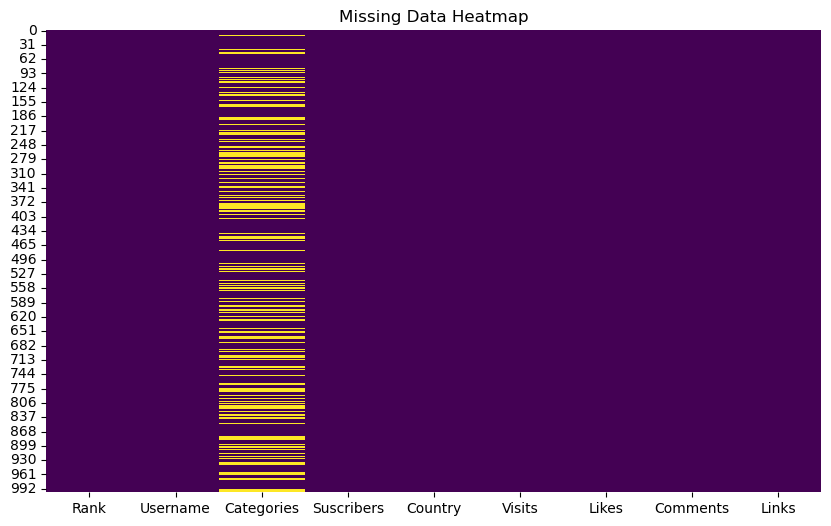

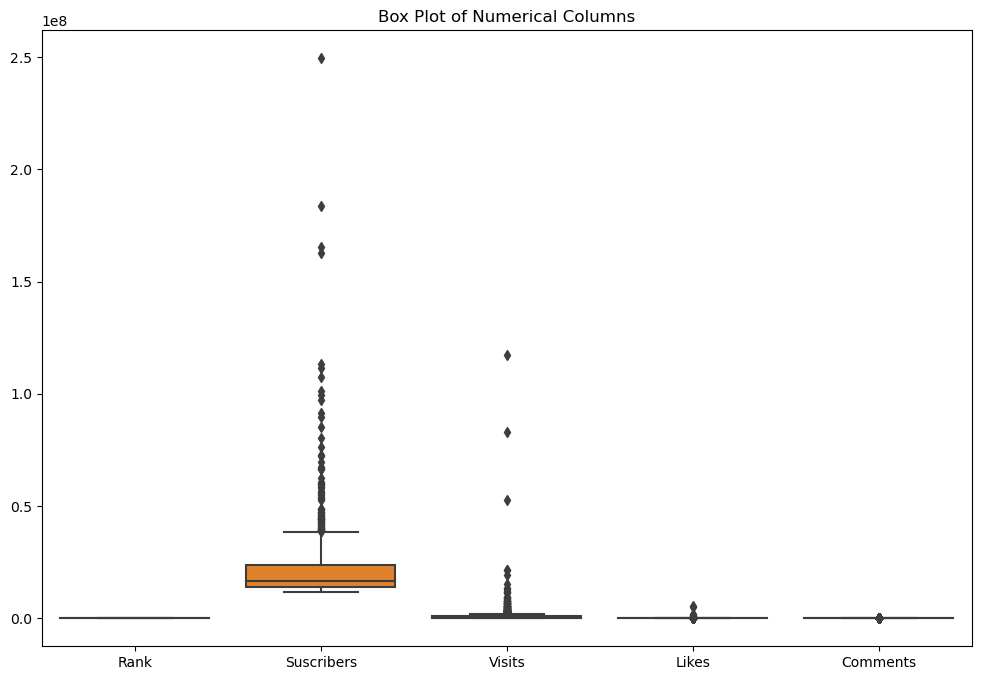

In [9]:
# Check for missing data
missing_values = df.isnull().sum()

# Visualize missing data using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# Visualize potential outliers using box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Box Plot of Numerical Columns')
plt.show()


# Trend Analysis

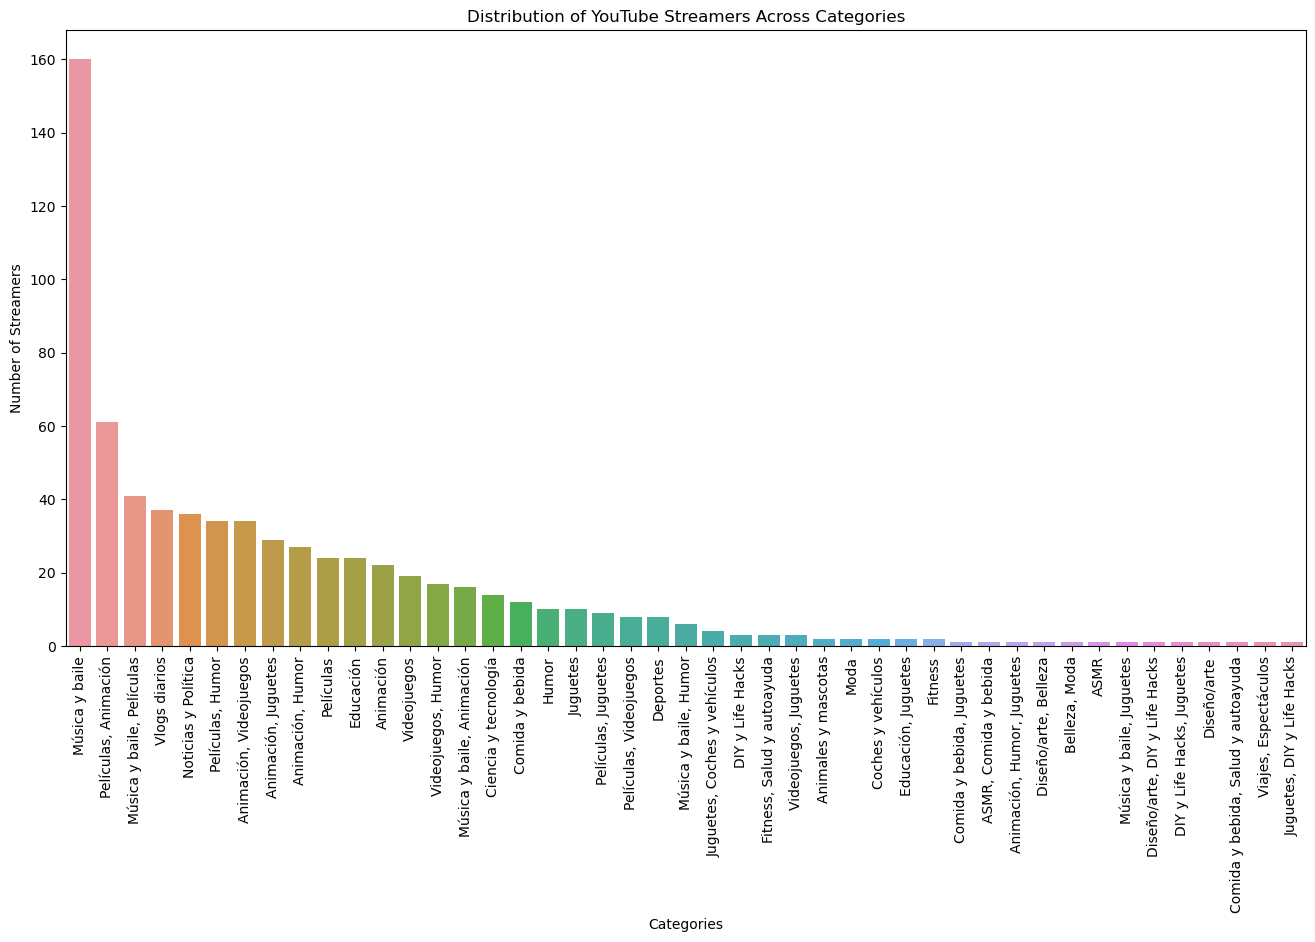

In [10]:
#Explore category trends using a bar chart
plt.figure(figsize=(16, 8))
sns.countplot(x='Categories', data=df, order=df['Categories'].value_counts().index)
plt.title('Distribution of YouTube Streamers Across Categories')
plt.xlabel('Categories')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=90)  # Rotate category labels for better readability
plt.show()

# Observation

Based on the above visualisation, it show that the **Música y baile** is the among the top YouTube streamers.
Is also the most popular in the categories column.

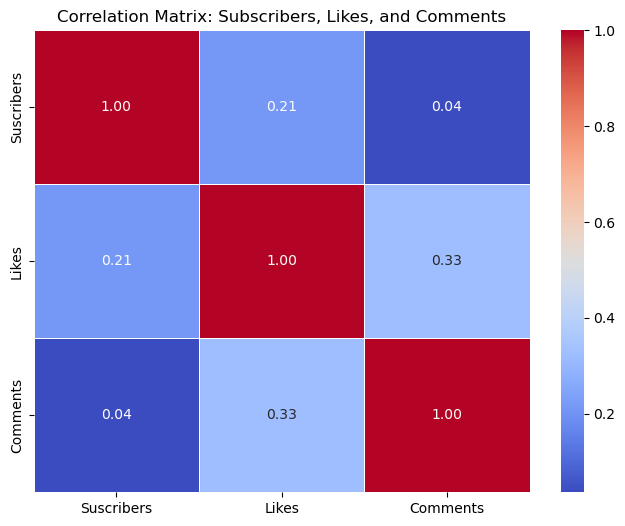

In [11]:
# Select relevant columns
subset = df[['Suscribers', 'Likes', 'Comments']]

# Calculate correlation matrix
correlation_matrix = subset.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix: Subscribers, Likes, and Comments')
plt.show()

# Observation
There is a relationship between Subscribers and likes with the correlation coffient of 0.21 on the above visual which indicate positive relationship between the Subscribers and likes. However, the strength of this relationship is weak. There is a tendency that as the number of subscribers increases, there is a slight increase in the number of likes, but the correlation is not strong.

# Audience Study

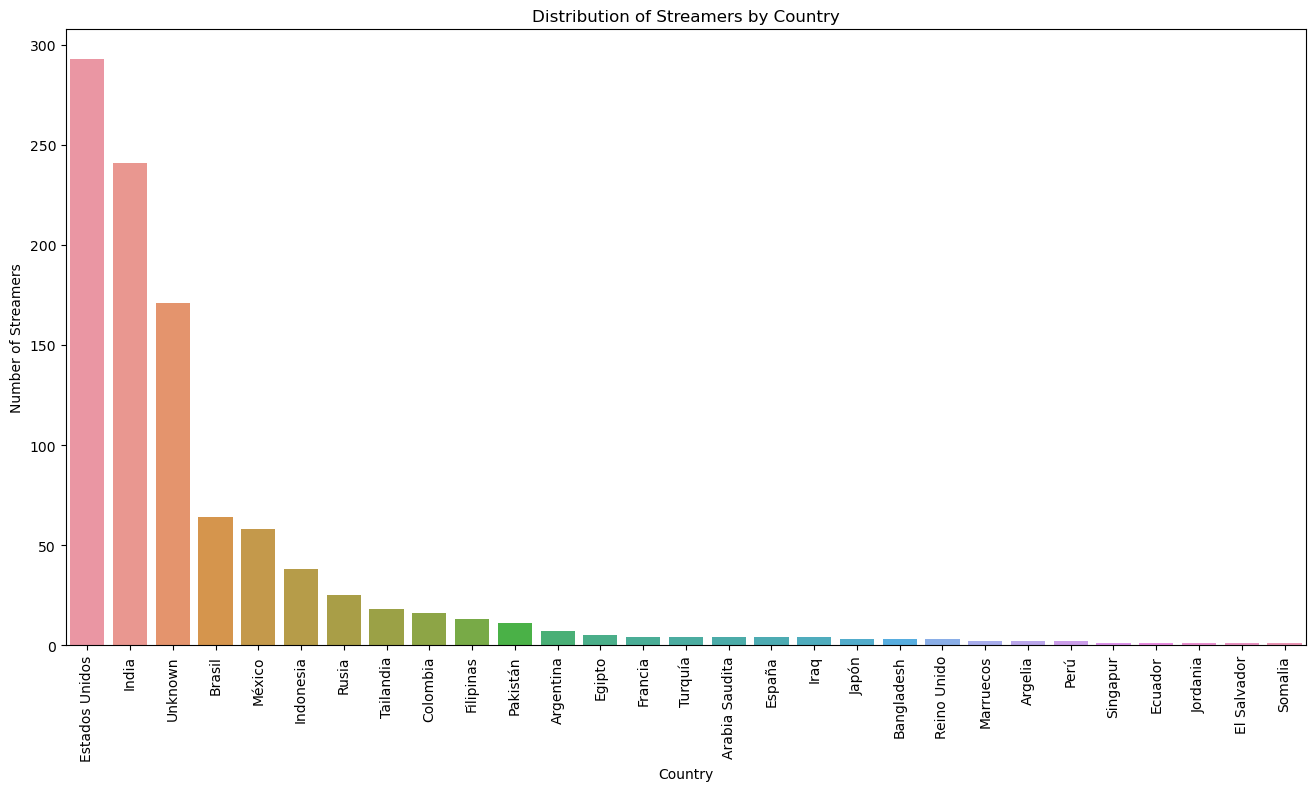

In [12]:
# Create a bar chart for the distribution of streamers by country
plt.figure(figsize=(16, 8))
sns.countplot(x='Country', data=df, order=df['Country'].value_counts().index)
plt.title('Distribution of Streamers by Country')
plt.xlabel('Country')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=90)
plt.show()

# Observation
The distribution suggests a global and diverse presence of YouTube content creators from different countries. The high numbers in the United States and India underscore the significant influence of these regions in the YouTube creator community.
The presence of "Unknown" entries high lights the importance of data integrity and completeness in understanding the full landscape of YouTube streamers.

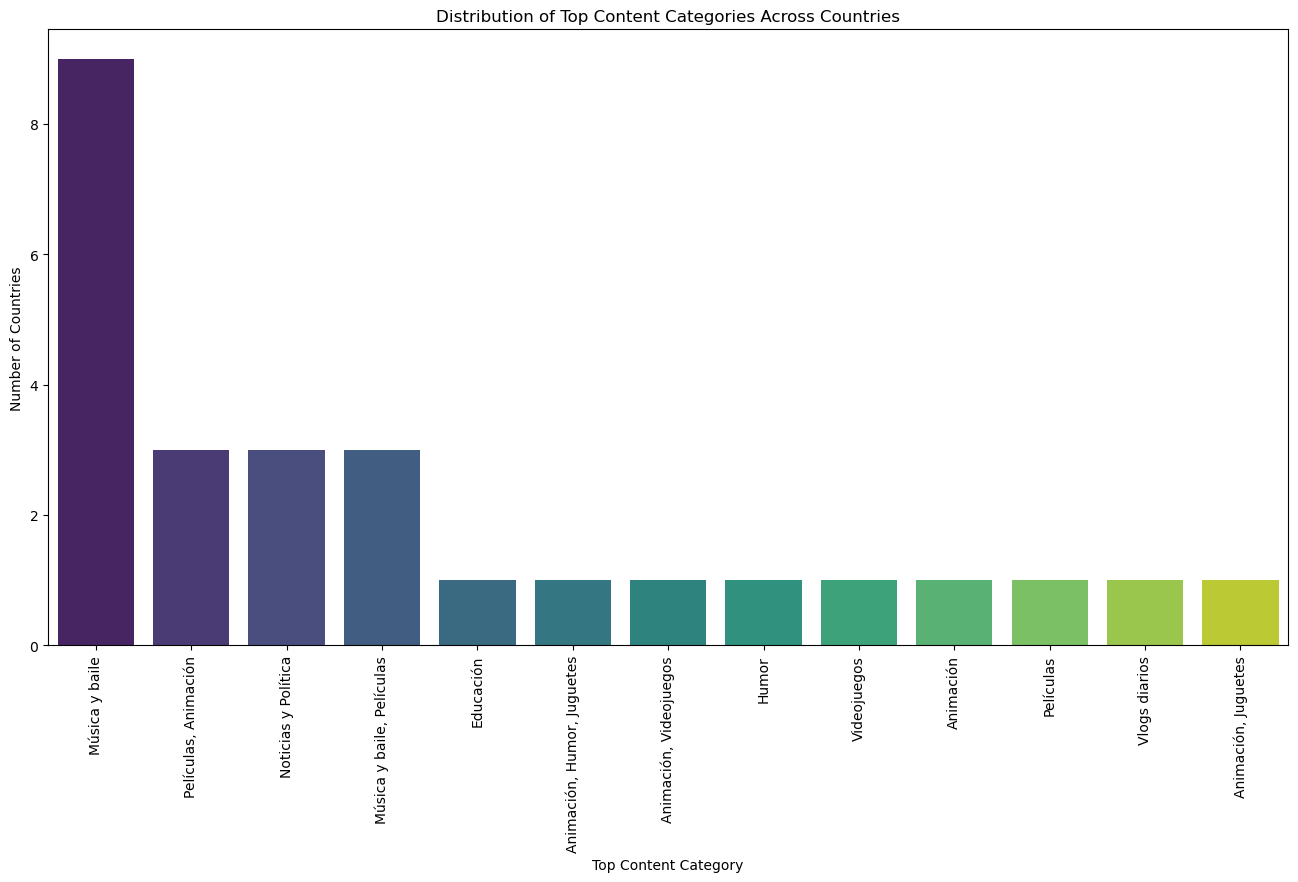

In [13]:
# Create a pivot table to count the occurrences of each category in each country
pivot_table = pd.pivot_table(df, values='Rank', index='Country', columns='Categories', aggfunc='count', fill_value=0)

# Identify the top content category for each country
top_category_by_country = pivot_table.idxmax(axis=1)

# Count the occurrences of each top category
top_category_counts = top_category_by_country.value_counts()

# Create a bar chart to visualize the distribution of top categories
plt.figure(figsize=(16, 8))
sns.barplot(x=top_category_counts.index, y=top_category_counts.values, palette='viridis')
plt.title('Distribution of Top Content Categories Across Countries')
plt.xlabel('Top Content Category')
plt.ylabel('Number of Countries')
plt.xticks(rotation=90)
plt.show()

Yes, there are clear regional preferences for specific content categories among YouTube streamers. The bar chart illustrates the distribution of top content categories across different countries. Key observations include:

# Performance Metrics

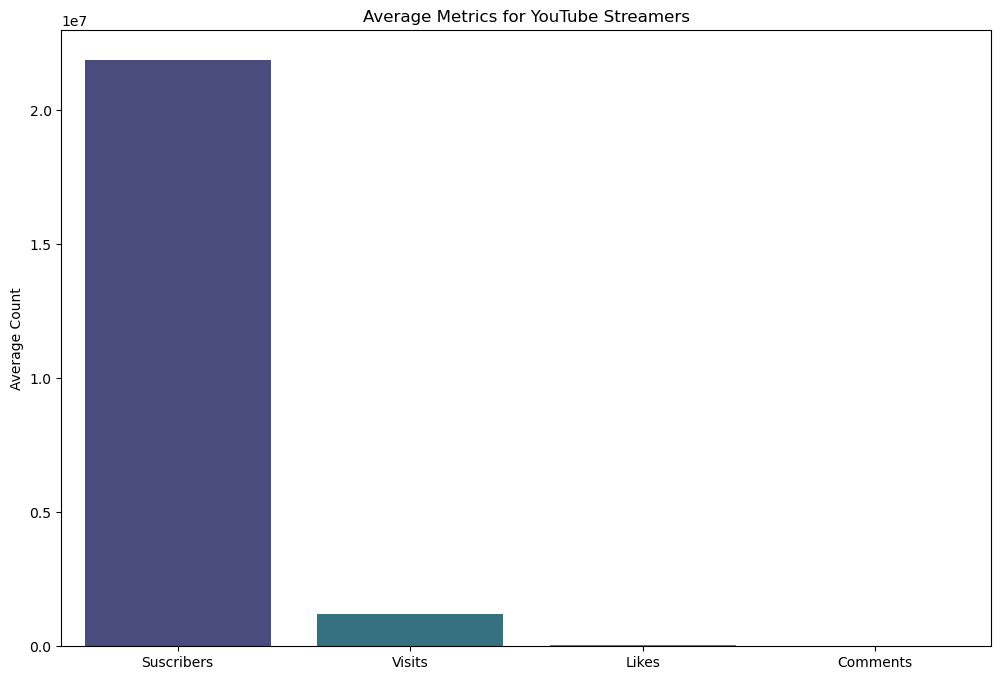

In [14]:
# Calculate average values
average_metrics = df[['Suscribers', 'Visits', 'Likes', 'Comments']].mean()

# Visualize the average metrics using a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=average_metrics.index, y=average_metrics.values, palette='viridis')
plt.title('Average Metrics for YouTube Streamers')
plt.ylabel('Average Count')
plt.show()

The high averages across these metrics collectively indicate a strong and engaged audience for the YouTube streamers in the dataset.

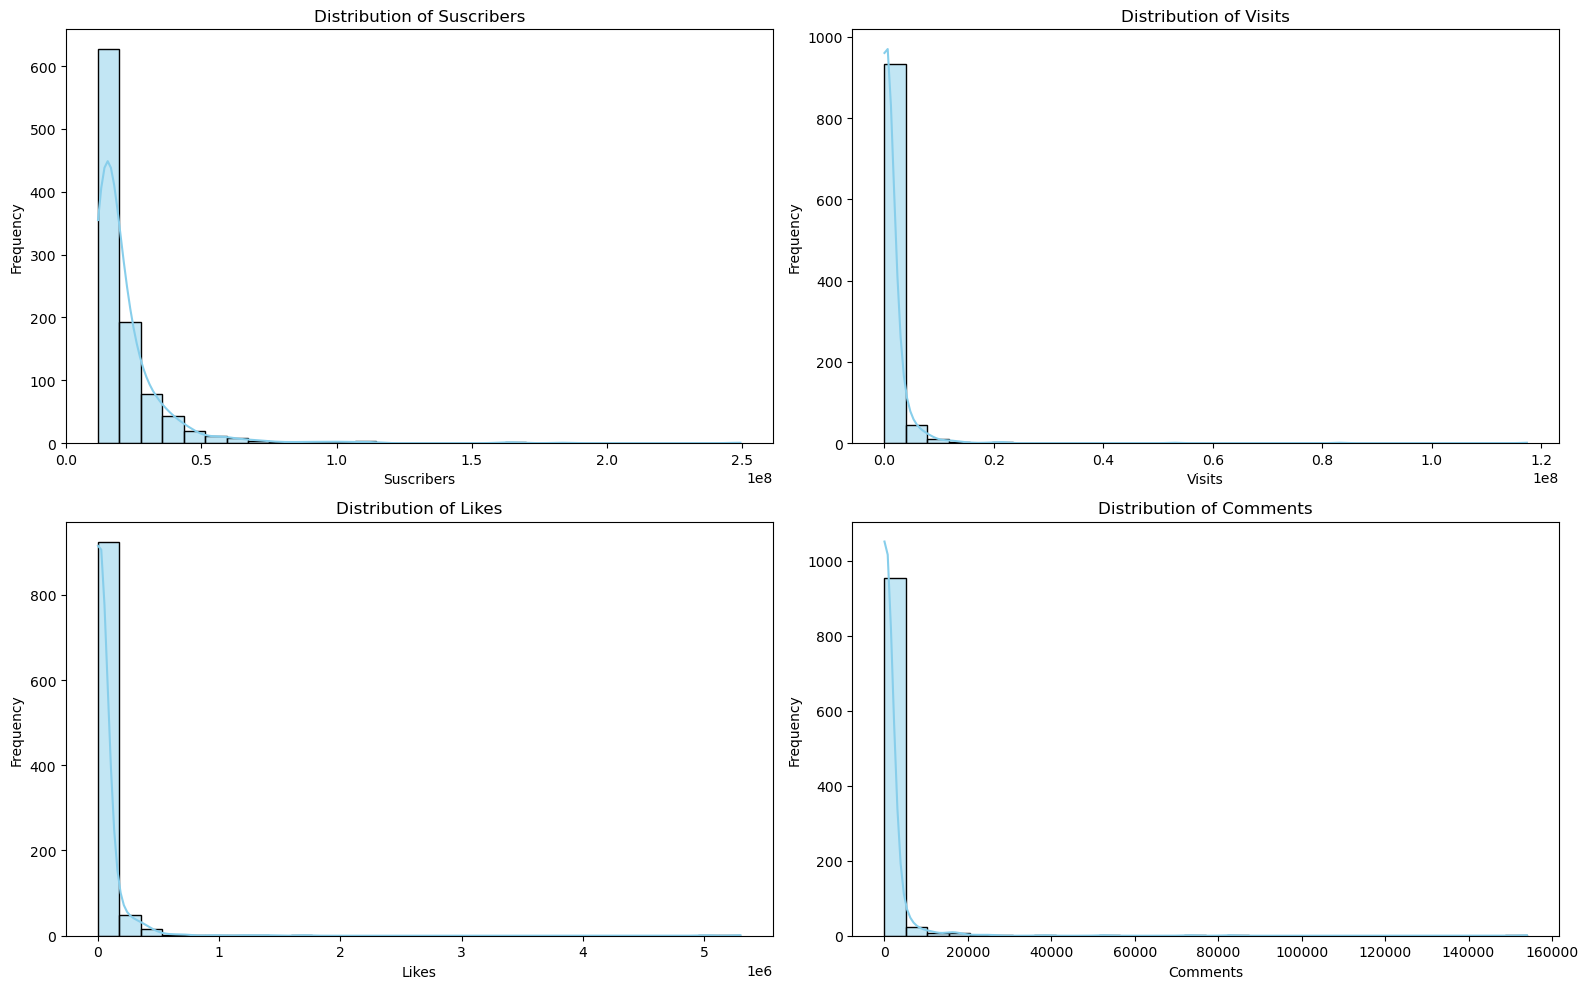

In [15]:
# Extract relevant metrics
metrics = df[['Suscribers', 'Visits', 'Likes', 'Comments']]
# Visualize distribution using histograms
plt.figure(figsize=(16, 10))

for i, metric in enumerate(metrics.columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(metrics[metric], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {metric}')
    plt.xlabel(metric)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [16]:
# Calculate average values for each metric
average_metrics = df[['Suscribers', 'Visits', 'Likes', 'Comments']].mean()

In [17]:
# Display the calculated average values
print("Average Number of Subscribers: {:.2f}".format(average_metrics['Suscribers']))
print("Average Number of Visits: {:.2f}".format(average_metrics['Visits']))
print("Average Number of Likes: {:.2f}".format(average_metrics['Likes']))
print("Average Number of Comments: {:.2f}".format(average_metrics['Comments']))

Average Number of Subscribers: 21894400.00
Average Number of Visits: 1209446.32
Average Number of Likes: 53632.59
Average Number of Comments: 1288.77


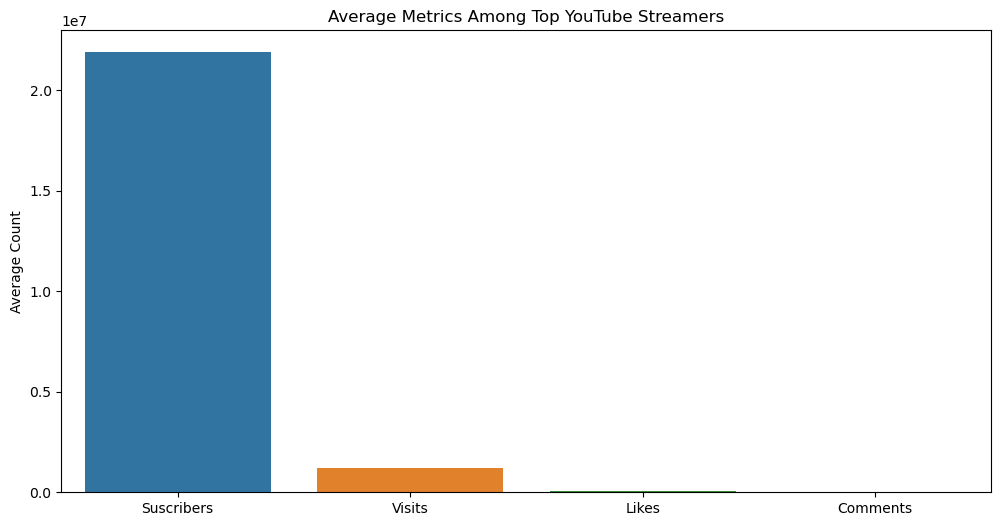

In [18]:
# Visualize the average metrics using a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=average_metrics.index, y=average_metrics.values)
plt.title('Average Metrics Among Top YouTube Streamers')
plt.ylabel('Average Count')
plt.show()

# Content Categories

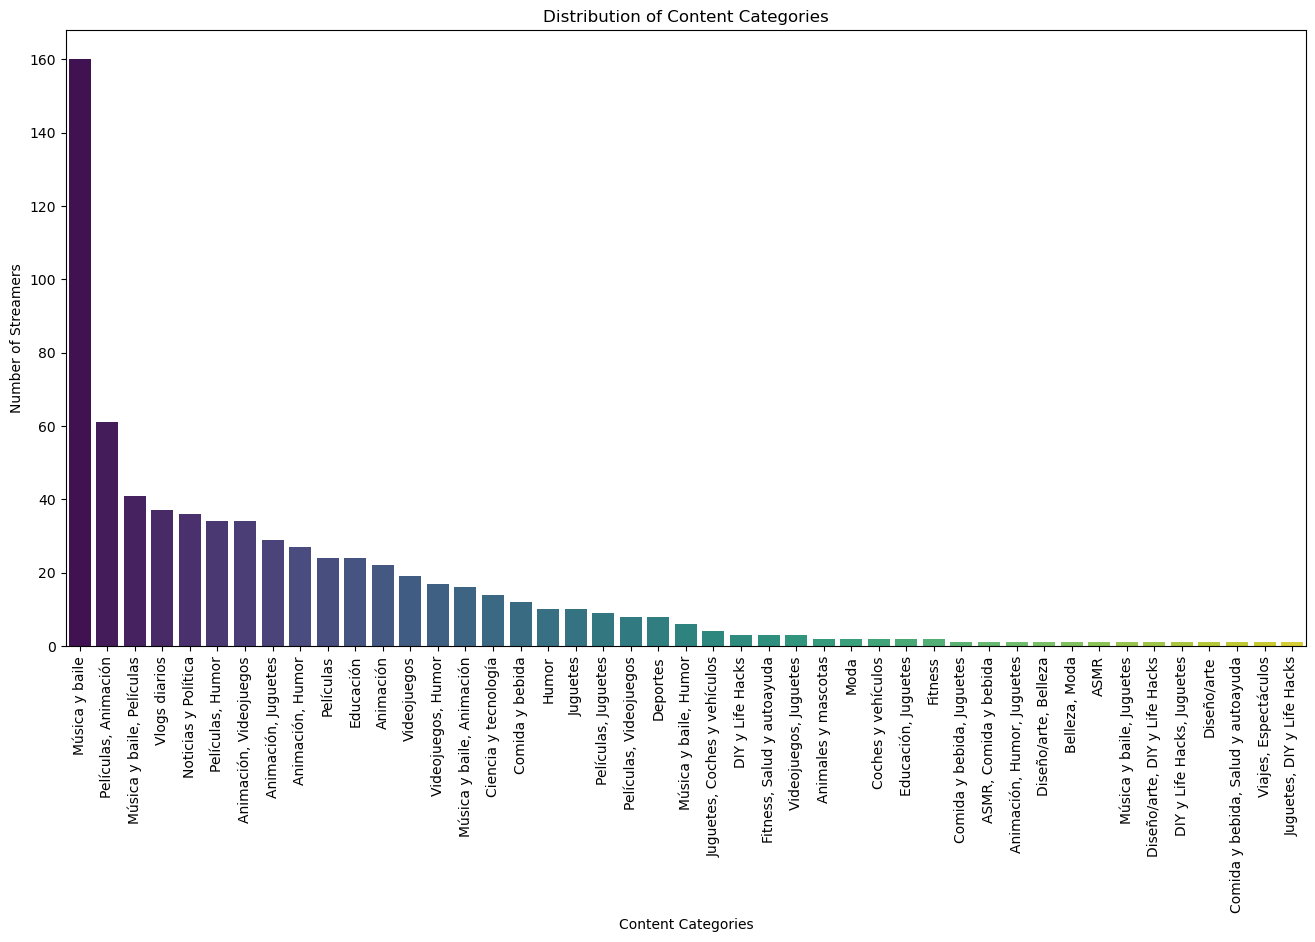

In [19]:
# Explore the distribution of content categories using a countplot
plt.figure(figsize=(16, 8))
sns.countplot(x='Categories', data=df, palette='viridis', order=df['Categories'].value_counts().index)
plt.title('Distribution of Content Categories')
plt.xlabel('Content Categories')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=90)
plt.show()

## Identify the categories with the highest number of streamers

In [20]:
# Identify the categories with the highest number of streamers
top_categories = df['Categories'].value_counts().head(5)  # Adjust the number as needed
print("Top Categories with the Highest Number of Streamers:")
print(top_categories)

Top Categories with the Highest Number of Streamers:
Música y baile               160
Películas, Animación          61
Música y baile, Películas     41
Vlogs diarios                 37
Noticias y Política           36
Name: Categories, dtype: int64


**Música y baile:** 160 streamers

**Películas, Animación:** 61 streamers

**Música y baile, Películas:** 41 streamers

**Vlogs diarios:** 37 streamers

**Noticias y Política:** 36 streamers

These categories have the highest representation in terms of the number of streamers in the dataset. It indicates that a significant proportion of the YouTube streamers in the dataset belong to these categories.

# Are there specific categories with exceptional performance metrics?

In [21]:
# Calculate average performance metrics for each category
average_metrics_by_category = df.groupby('Categories')[['Suscribers', 'Visits', 'Likes', 'Comments']].mean()

# Identify categories with exceptional performance (e.g., above-average subscribers, likes, and comments)
exceptional_categories = average_metrics_by_category[(average_metrics_by_category['Suscribers'] > average_metrics_by_category['Suscribers'].mean()) &
                                                      (average_metrics_by_category['Likes'] > average_metrics_by_category['Likes'].mean()) &
                                                      (average_metrics_by_category['Comments'] > average_metrics_by_category['Comments'].mean())]
print('Categories with exceptional performance metrics:')
print(exceptional_categories)

Categories with exceptional performance metrics:
                                 Suscribers        Visits          Likes  \
Categories                                                                 
Animación, Humor               2.078519e+07  3.760126e+06  145768.333333   
Diseño/arte, DIY y Life Hacks  2.570000e+07  2.600000e+06  127300.000000   
Videojuegos                    2.498421e+07  1.387137e+06   57121.052632   
Videojuegos, Humor             2.876471e+07  1.023968e+07  420511.764706   

                                  Comments  
Categories                                  
Animación, Humor               5344.962963  
Diseño/arte, DIY y Life Hacks  2200.000000  
Videojuegos                    1760.157895  
Videojuegos, Humor             4827.058824  


The output indicates the categories with exceptional performance metrics based on the criteria of having metrics (Subscribers, Visits, Likes, Comments) above the mean values for each category. Here are the categories with exceptional performance:
**Animación, Humor:**

**Diseño/arte, DIY y Life Hacks**

**Videojuegos**

**Videojuegos, Humor:**

These categories stand out for having metrics above the mean values within their respective categories. It indicates that these content categories, on average, perform exceptionally well compared to other categories in terms of Subscribers, Visits, Likes, and Comments.

# Brands and Collaborations

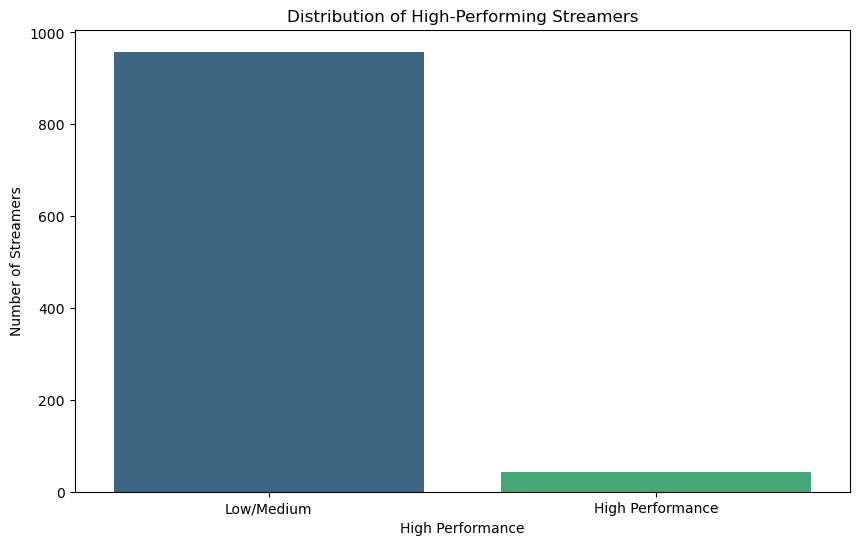

In [22]:
# Create a new column to categorize high-performing streamers based on a threshold
# You can adjust the threshold values based on your criteria
df['HighPerformance'] = ((df['Suscribers'] > df['Suscribers'].mean()) &
                        (df['Likes'] > df['Likes'].mean()) &
                        (df['Comments'] > df['Comments'].mean())).astype(int)

# Analyze the distribution of high-performing streamers
plt.figure(figsize=(10, 6))
sns.countplot(x='HighPerformance', data=df, palette='viridis')
plt.title('Distribution of High-Performing Streamers')
plt.xlabel('High Performance')
plt.ylabel('Number of Streamers')
plt.xticks([0, 1], ['Low/Medium', 'High Performance'])
plt.show()

# Benchmarking

In [23]:
# Calculate average performance metrics
average_subscribers = df['Suscribers'].mean()
average_visits = df['Visits'].mean()
average_likes = df['Likes'].mean()
average_comments = df['Comments'].mean()

# Identify streamers with above-average performance
above_average_streamers = df[
    (df['Suscribers'] > average_subscribers) &
    (df['Visits'] > average_visits) &
    (df['Likes'] > average_likes) &
    (df['Comments'] > average_comments)
]

# Display the identified streamers
print("Streamers with Above-Average Performance:")
print(above_average_streamers[['Rank', 'Username', 'Suscribers', 'Visits', 'Likes', 'Comments']])

Streamers with Above-Average Performance:
     Rank               Username   Suscribers       Visits      Likes  \
1       2                MrBeast  183500000.0  117400000.0  5300000.0   
5       6              PewDiePie  111500000.0    2400000.0   197300.0   
26     27            dudeperfect   59700000.0    5300000.0   156500.0   
34     35            TaylorSwift   54100000.0    4300000.0   300400.0   
39     40            JuegaGerman   48600000.0    2000000.0   117100.0   
43     44               A4a4a4a4   47300000.0    9700000.0   330400.0   
58     59              Mikecrack   43400000.0    2200000.0   183400.0   
62     63         KimberlyLoaiza   42100000.0    5300000.0   271300.0   
64     65        luisitocomunica   41100000.0    2500000.0   128900.0   
70     71            JessNoLimit   39600000.0    1300000.0    73500.0   
96     97         TotalGaming093   36300000.0    1500000.0   129400.0   
98     99   TechnoGamerzOfficial   35600000.0    6200000.0   341800.0   
100   101

In [24]:
# Calculate a composite performance score (you can customize the formula)
df['PerformanceScore'] = df['Suscribers'] + df['Visits'] + df['Likes'] + df['Comments']

# Rank content creators based on the performance score
top_performing_creators = df.sort_values(by='PerformanceScore', ascending=False).head(10)

# Display the top-performing creators
print("Top 10 Performing Content Creators:")
print(top_performing_creators[['Rank', 'Username', 'PerformanceScore']])

Top 10 Performing Content Creators:
     Rank            Username  PerformanceScore
1       2             MrBeast       306218500.0
0       1             tseries       249588978.0
2       3           CoComelon       172524700.0
3       4            SETIndia       162615775.0
136   137            MrBeast2       119411600.0
4       5       KidsDianaShow       117412400.0
5       6           PewDiePie       114102200.0
6       7  LikeNastyaofficial       110128000.0
7       8         VladandNiki       105522100.0
8       9     zeemusiccompany        99776932.0


The top-performing creators represent a diverse range of content genres, including music, entertainment, children's content, and more.
Established entities like T-Series and SET India compete with individual creators like MrBeast and PewDiePie.
Children's content creators like CoComelon, KidsDianaShow, and LikeNastyaofficial have a strong presence in the top performers.
These insights provide an overview of the top-performing content creators based on the composite performance score.

# Content Recommendations